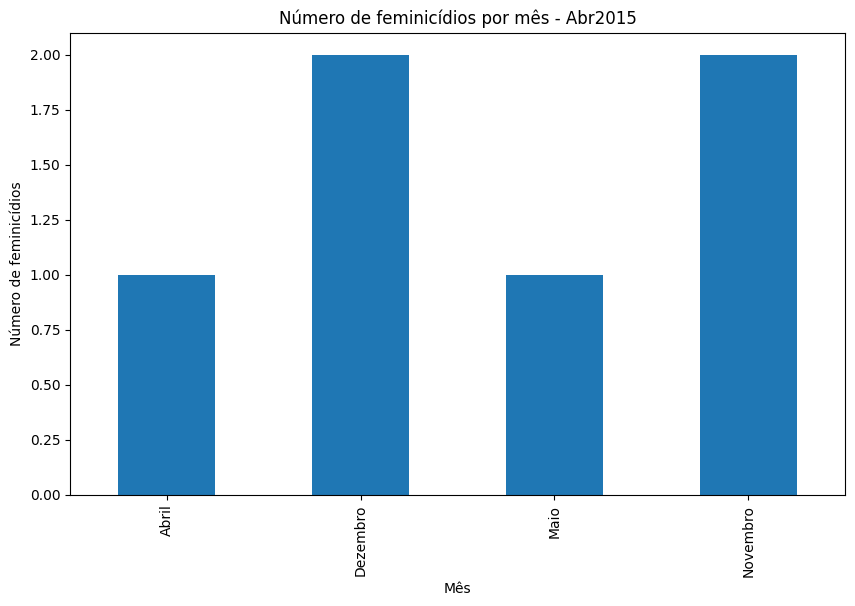

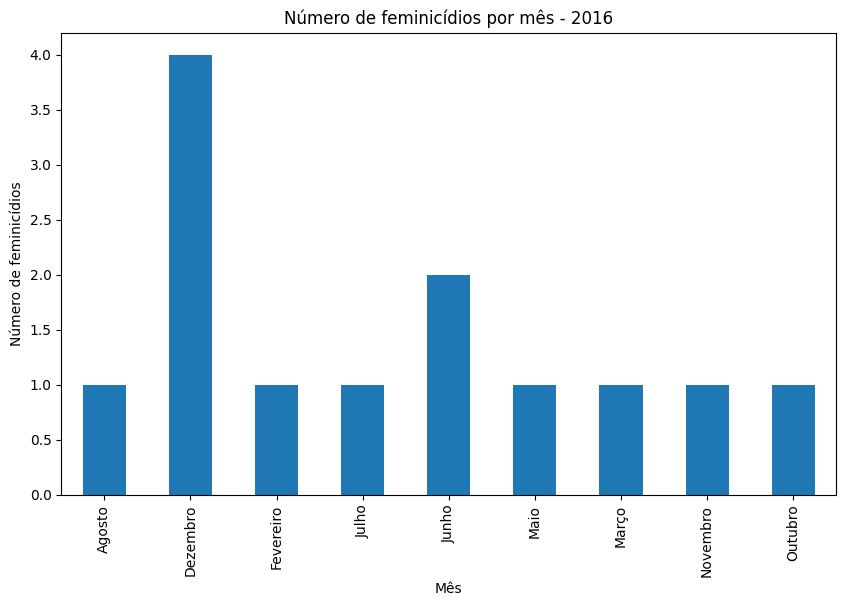

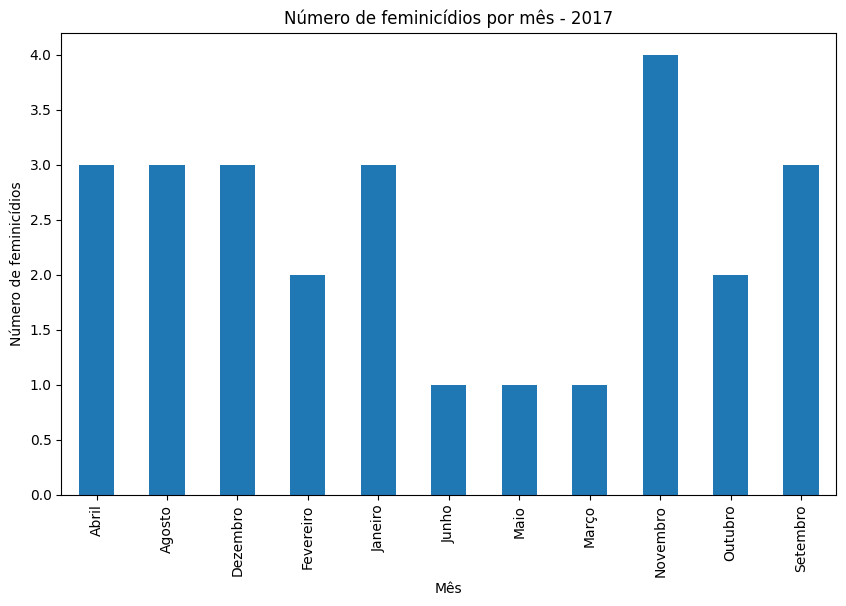

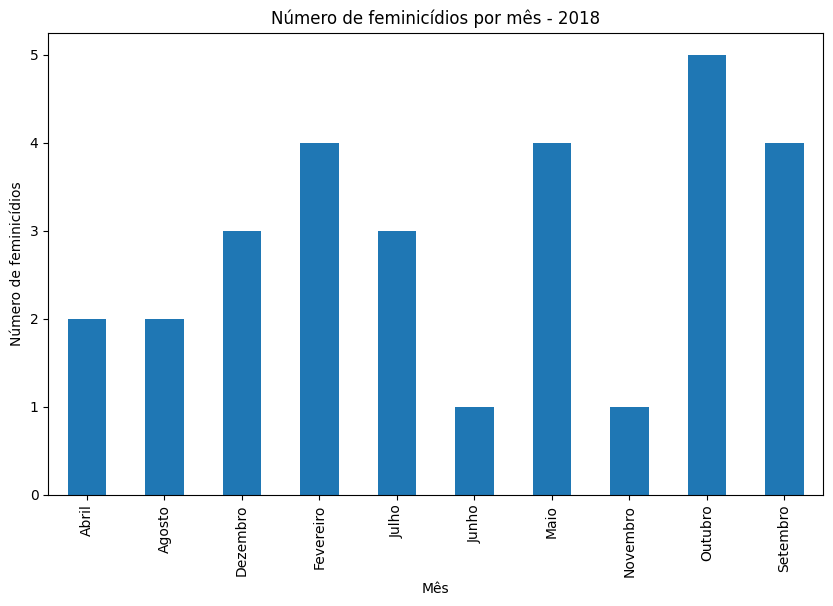

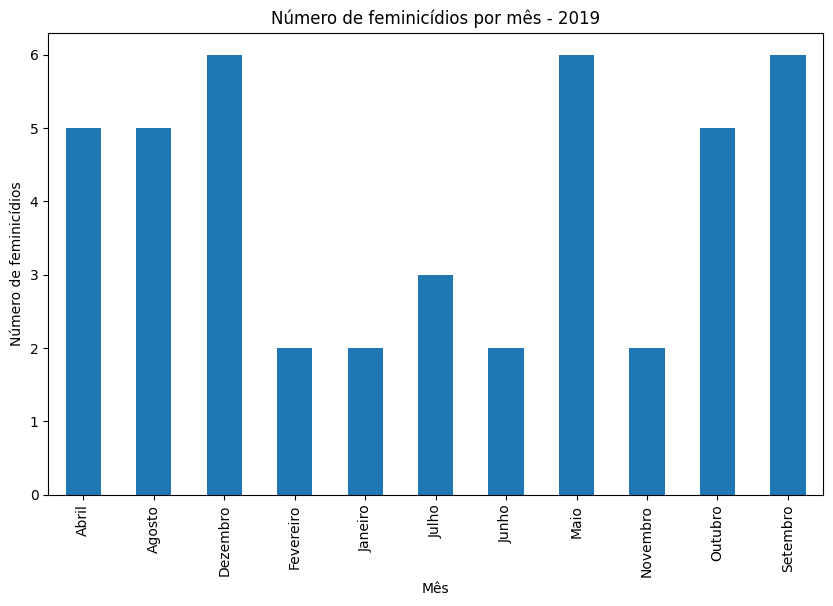

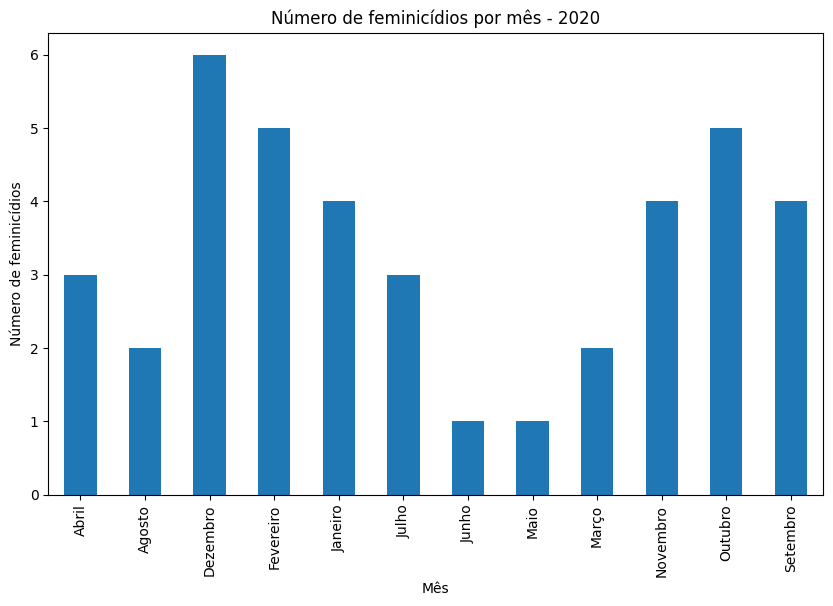

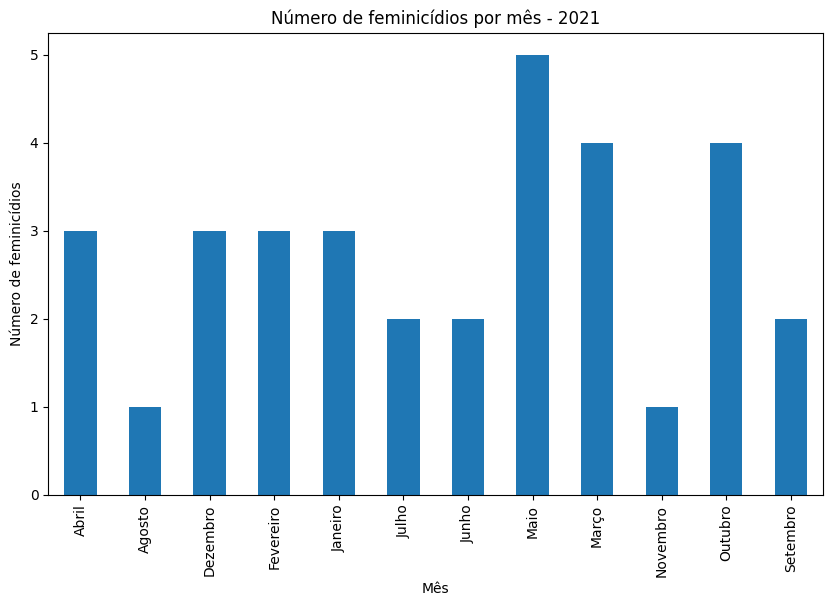

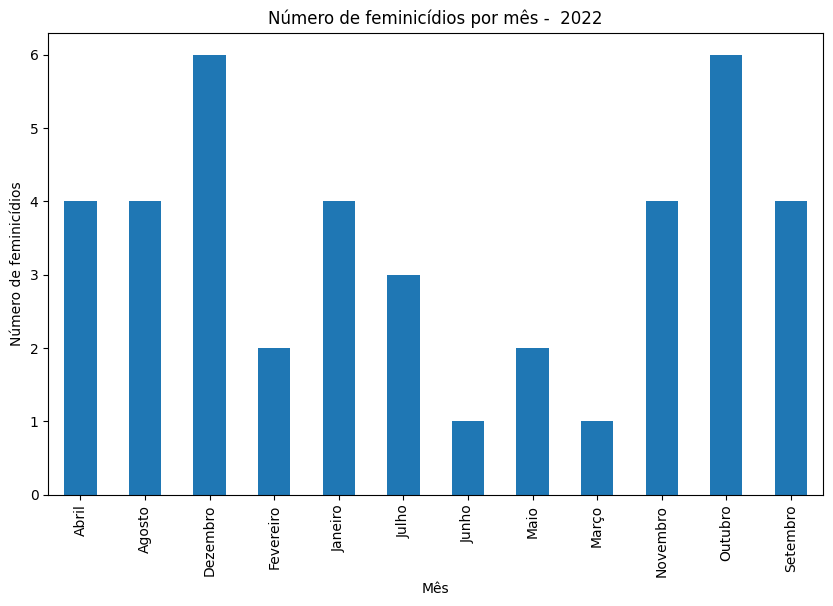

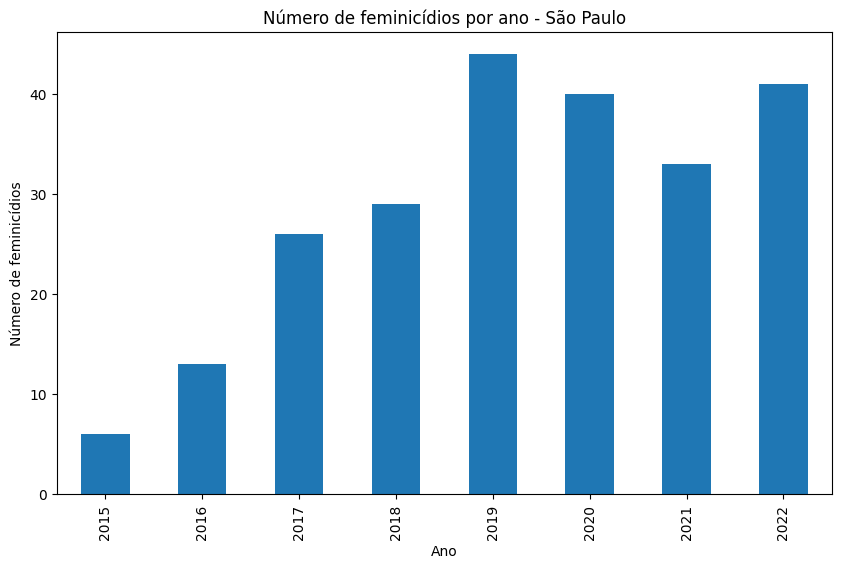

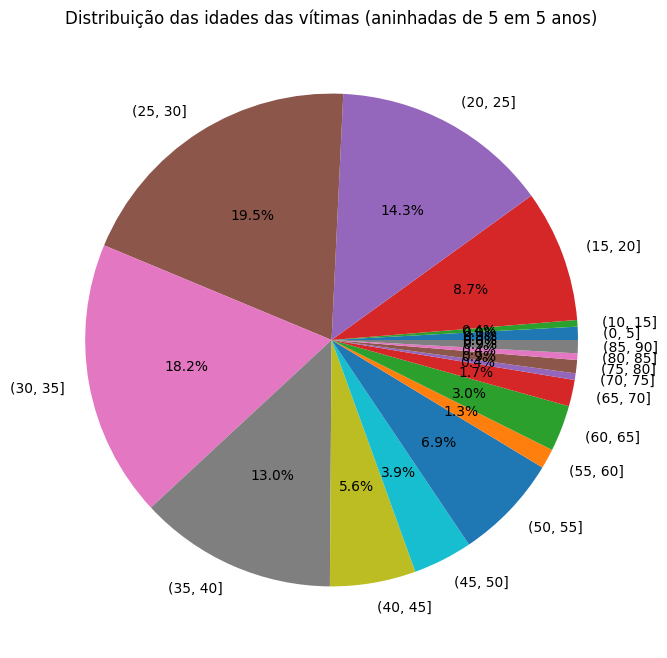

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel
xlsx_file = 'Feminicidio_2015_2022.xlsx'
xls = pd.ExcelFile(xlsx_file)

# Lista para armazenar os DataFrames de cada ano
dfs = []

# Iterar sobre as abas do arquivo Excel
for aba in xls.sheet_names:
    # Carregar o DataFrame da aba atual
    df = pd.read_excel(xlsx_file, sheet_name=aba)
    
    # Remover dados duplicados
    df = df.drop_duplicates()
    
    # Filtrar dados da cidade de São Paulo
    df_sp = df[df['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo'].copy()
    
    # Transformar strings em minúsculo e padronizar
    df_sp['cidade'] = df_sp['MUNICIPIO_CIRCUNSCRICAO'].str.lower()
    
    # Transformar dados temporais para o tipo apropriado
    df_sp['DATAHORA_REGISTRO_BO'] = pd.to_datetime(df_sp['DATAHORA_REGISTRO_BO'], format='%Y-%m-%d')
    
    # Criar novas colunas para dia do mês e mês
    df_sp['dia_mes'] = df_sp['DATAHORA_REGISTRO_BO'].dt.day
    df_sp['mes'] = df_sp['DATAHORA_REGISTRO_BO'].dt.month
    
    # Mapear os nomes dos meses em português
    meses_em_portugues = {
        1: 'Janeiro',
        2: 'Fevereiro',
        3: 'Março',
        4: 'Abril',
        5: 'Maio',
        6: 'Junho',
        7: 'Julho',
        8: 'Agosto',
        9: 'Setembro',
        10: 'Outubro',
        11: 'Novembro',
        12: 'Dezembro'
    }
    
    # Aplicar a tradução dos nomes dos meses
    df_sp['mes'] = df_sp['mes'].map(meses_em_portugues)
    
    # Gerar o gráfico de barras para contar o número de feminicídios por mês
    feminicidios_por_mes = df_sp['mes'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    feminicidios_por_mes.plot(kind='bar')
    plt.title(f'Número de feminicídios por mês - {aba}')
    plt.xlabel('Mês')
    plt.ylabel('Número de feminicídios')
    plt.show()
    
    # Adicionar o DataFrame da aba atual à lista
    dfs.append(df_sp)

# Concatenar os DataFrames de cada ano em um único DataFrame
dataset_sp = pd.concat(dfs)

# Gerar o gráfico de barras para contar o número de feminicídios por ano
feminicidios_por_ano = dataset_sp['ANO ESTATISTICA'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
feminicidios_por_ano.plot(kind='bar')
plt.title('Número de feminicídios por ano - São Paulo')
plt.xlabel('Ano')
plt.ylabel('Número de feminicídios')
plt.show()

# Criar os intervalos de idade
intervalos_idade = pd.cut(dataset_sp['IDADE_PESSOA'], bins=range(0, 101, 5))

# Contar a quantidade de vítimas em cada intervalo
idades_aninhadas = intervalos_idade.value_counts().sort_index()

# Gerar o gráfico de pizza
plt.figure(figsize=(10, 8))
idades_aninhadas.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição das idades das vítimas (aninhadas de 5 em 5 anos)')
plt.ylabel('')
plt.show()